In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('bsbm.csv')
df

,program,profile,graph,loading,process
0,rust,RDFS,4987,0.067568,0.004483
1,rust,RDFS,4987,0.065936,0.004135
2,rust,RDFS,4987,0.048169,0.003601
3,rust,RDFS,4987,0.045302,0.003738
4,rust,RDFS,4987,0.044945,0.004386
5,rust,RHODF,4987,0.045396,0.000767
6,rust,RHODF,4987,0.046546,0.000906
7,rust,RHODF,4987,0.044798,0.000848
8,rust,RHODF,4987,0.045014,0.000466
9,rust,RHODF,4987,0.044838,0.000586


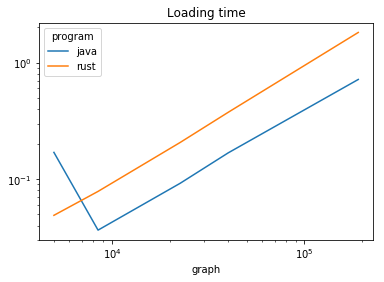

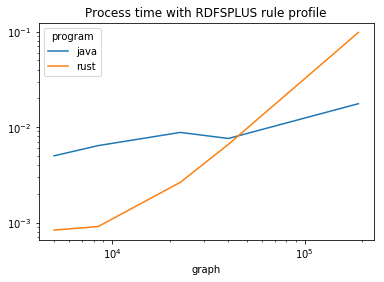

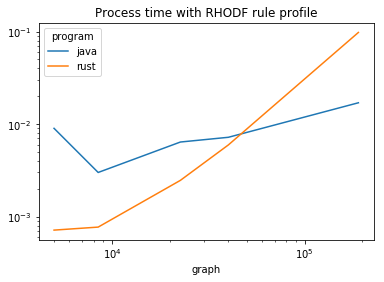

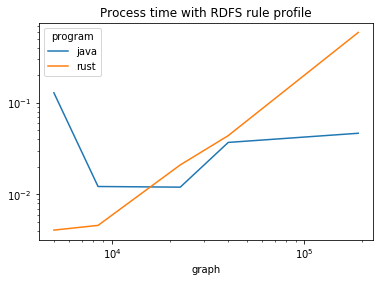

In [13]:
profiles = list(set(df['profile']))
data = df.groupby(['program','graph'])
means = data['loading'].mean().unstack().transpose()
ax = means.plot(title='Loading time',loglog=True)
ax
for profile in profiles:
    data = df[df['profile']==profile].groupby(['program','graph'])
    means = data['process'].mean().unstack().transpose()
    ax = means.plot(title='Process time with {} rule profile'.format(profile),loglog=True)
    ax